#### [ 시도별 전출입 인구수 분석  - Matplotlib ]
- 데이터셋 : 1970년 ~ 2017년까지 인구이동수
- 대구의 타지역 이동 인구수 분석
- 전국의 인구 이동수에 대한 분석
- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명이 맞는지 확인 
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측지 정도 확인
    * 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리 
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 : 실제 데이터와 타입 일치
    * 데이터 가공 : 분석하고자하는 데이터 형태
        - 행인덱스 처리 : 멀티인덱스/컬럼 => 행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 : 연속 -> 범주 / 범주 -> 연속
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리


- [1] 준비과정 : 모듈,데이터


In [38]:
# [1-1]
import pandas as pd                    # 데이터분석용 모듈
import matplotlib.pyplot as plt        # 데이터 시각화용 모듈

In [39]:
# [1-2] 
F_DATA = r'C:\Users\a\Desktop\EX_PANDAS\data\시도별 전출입 인구수.xlsx'

In [40]:
# [1-3] 
dataDF = pd.read_excel(F_DATA)

- [2] 데이터 확인 : 행과 컬럼수, 실제데이터와 컬럼 타입, 결측치 체크

In [41]:
# [2-1] 기본정보 확인 => info(),describe()
# - 행 수 , 컬럼 수, 컬럼별 결측치 아닌(non-null) 데이터 수, 데이터 타입
# - 메모리 사용량
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [42]:
# [2-2] 기본정보 확인 => info(),describe()
# - 수치 데이터 컬럼의 데이터 분포 확인 : 최대값, 최소값 ,표준편차,사분위수,평균값
# - 범주 데이터 컬럼의 데이터 분포 확인 : 고유값, 가장 많이 나온 값, 가장 많이 나온 값의 빈도수
dataDF.describe(include='all')

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [43]:
# [2-3] 실제데이터 info()에서 확인 한 타입 비교 => head()/tail()
dataDF.head(3)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


In [44]:
### 기본 정보 확인 후 결과
# - 불필요한 행/컬럼 : 0번행 삭제
# - 결측치 : '전출지별' 컬럼 ==> 이전 행 값으로 채우기 
# - 이상치 : 행별로 '-'값이 수치값과 섞여 있음 ==> 0 처리 필요!

- [3] 데이터 전처리
    * 기본확인 파악된 내용들 처리
    * 불필요 데이터 삭제 : 0번행 삭제
    * 결측치 데이터 처리 : '전출지별'컬럼 처리
    * 이상치 데이터 처리 : '-'에 대한 처리
    * 데이터 자료형 일치 : 형변환

In [45]:
# [3-1] 불필요 데이터 처리
dataDF.drop(index = 0,axis=0,inplace=True)

In [46]:
# [3-1] 결측치 처리 처리
dataDF.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [47]:
dataDF[['1984','1985','1986']].isna()

,1984,1985,1986
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
320,False,False,False
321,False,False,False
322,False,False,False
323,False,False,False


In [48]:
# - '1984','1985','1986' 컬럼만 추출
a = dataDF[['1984','1985','1986']].isna()
a[a.sum(axis=1)>0]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [49]:
dataDF[['1984','1985','1986']] = dataDF[['1984','1985','1986']].fillna(0)

In [50]:
dataDF['전출지별'] =dataDF['전출지별'].ffill()

In [51]:
dataDF.isna().sum()

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [52]:
a = dataDF[['1984','1985','1986']].isna()
a[a.sum(axis=1)>0]

,1984,1985,1986


In [53]:
dataDF.head(5)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465


In [54]:
# [3-3] 이상치 처리 처리
dataDF.replace('-',0,inplace=True)

C:\Users\a\AppData\Local\Temp\ipykernel_10520\747415053.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF.replace('-',0,inplace=True)


In [55]:
# [3-4] 자료형 변환 
d_ = dict(zip(dataDF.columns[2:].to_list(),['int']*(dataDF.shape[1]-2)))
dataDF = dataDF.astype(d_)

In [56]:
dataDF.dtypes.value_counts()

int32     48
object     2
Name: count, dtype: int64

- [4] 데이터 가공
    * 대구에서 전지역 전입 인구수 분석
    * 전출지별 - '대구광역시'
    * 전입지별 - '대구광역시','전국' 제외

In [57]:
# - 대구광역시 데이터만 추출
mask = (dataDF['전출지별']=='대구광역시')
cityDF = dataDF[mask]
cityDF.info

<bound method DataFrame.info of      전출지별     전입지별  1970  1971  1972  1973  1974  1975  1976  1977  ...  \
55  대구광역시       전국     0     0     0     0     0     0     0     0  ...   
56  대구광역시    서울특별시     0     0     0     0     0     0     0     0  ...   
57  대구광역시    부산광역시     0     0     0     0     0     0     0     0  ...   
58  대구광역시    대구광역시     0     0     0     0     0     0     0     0  ...   
59  대구광역시    인천광역시     0     0     0     0     0     0     0     0  ...   
60  대구광역시    광주광역시     0     0     0     0     0     0     0     0  ...   
61  대구광역시    대전광역시     0     0     0     0     0     0     0     0  ...   
62  대구광역시    울산광역시     0     0     0     0     0     0     0     0  ...   
63  대구광역시  세종특별자치시     0     0     0     0     0     0     0     0  ...   
64  대구광역시      경기도     0     0     0     0     0     0     0     0  ...   
65  대구광역시      강원도     0     0     0     0     0     0     0     0  ...   
66  대구광역시     충청북도     0     0     0     0     0     0     0     0  

In [58]:
cityDF = cityDF.drop('전출지별',axis=1)

In [59]:
cityDF.set_index('전입지별',inplace=True)

In [60]:
cityDF.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지별')

In [61]:
cityDF.drop(['대구광역시','전국'],inplace=True)

In [62]:
cityDF.value_counts

<bound method DataFrame.value_counts of          1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  ...  \
전입지별                                                                 ...   
서울특별시       0     0     0     0     0     0     0     0     0     0  ...   
부산광역시       0     0     0     0     0     0     0     0     0     0  ...   
인천광역시       0     0     0     0     0     0     0     0     0     0  ...   
광주광역시       0     0     0     0     0     0     0     0     0     0  ...   
대전광역시       0     0     0     0     0     0     0     0     0     0  ...   
울산광역시       0     0     0     0     0     0     0     0     0     0  ...   
세종특별자치시     0     0     0     0     0     0     0     0     0     0  ...   
경기도         0     0     0     0     0     0     0     0     0     0  ...   
강원도         0     0     0     0     0     0     0     0     0     0  ...   
충청북도        0     0     0     0     0     0     0     0     0     0  ...   
충청남도        0     0     0     0     0     0     

- [5] 분석 : 대구에서 전지역 전입 인구수 분석

In [63]:
def set_customFont(font_path):
    from matplotlib import font_manager as fm,rc
 
# 폰트 패밀리 이름 가져오기
    font_name = fm.FontProperties(fname = font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
    rc('font',family = font_name)

set_customFont(r'C:\Windows\Fonts\malgunbd.ttf')

- [5] 히스토그램으로 특정 컬럼 데이터 분포 시각화

In [64]:
# - 값 기준 정렬 ==> [기본] 오름차순
cityDF['2000'].sort_values(ascending=False)

전입지별
경상북도       52556
서울특별시      16970
경기도        13071
경상남도        7977
부산광역시       5844
울산광역시       3465
대전광역시       2378
인천광역시       2209
충청남도        2087
강원도         1889
충청북도        1824
전라북도        1016
전라남도         971
제주특별자치도      701
광주광역시        531
세종특별자치시        0
Name: 2000, dtype: int32

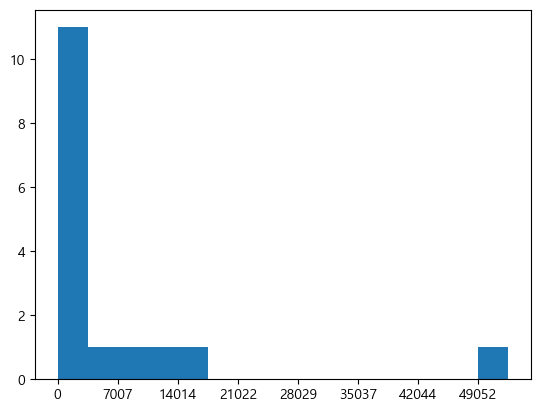

In [80]:
n,bin,object = plt.hist(cityDF['2000'],bins= 15)

labels = list(map(int,bin.tolist()))
plt.xticks(bin[::2],labels[::2])
plt.show()

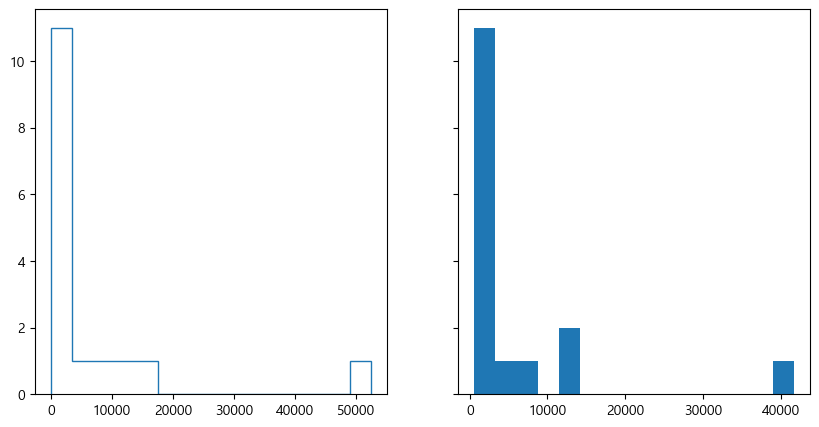

In [79]:
# 2000년도 대구 지역에서 타지역으로 이동인구수 분포
fig = plt.figure(figsize=(10,5))

ax1,ax2 = fig.subplots(1,2,sharey=True)
ax1.hist(cityDF['2000'],bins= 15,histtype = 'step')
ax2.hist(cityDF['2017'],bins= 15,histtype = 'stepfilled')
plt.show()